# Time Series Analysis with ARIMA

In [1]:
import warnings 
import itertools 
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_excel(r"C:\Users\Sukanya\Desktop\Data Science Tool Kit\Datasets\Superstore-for-Tableau.xls")
furniture = df.loc[df['Category'] == 'Furniture']

In [3]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2011-01-07 00:00:00'), Timestamp('2014-12-31 00:00:00'))

In [4]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 
        'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
        'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 
        'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')

furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [5]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [6]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2011-01-07', '2011-01-08', '2011-01-11', '2011-01-12',
               '2011-01-14', '2011-01-15', '2011-01-17', '2011-01-20',
               '2011-01-21', '2011-01-22',
               ...
               '2014-12-19', '2014-12-20', '2014-12-22', '2014-12-23',
               '2014-12-24', '2014-12-25', '2014-12-26', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=890, freq=None)

In [7]:
furniture.head(3)

,Sales
Order Date,
2011-01-07,2573.820
2011-01-08,76.728
2011-01-11,51.940


In [8]:
y = furniture['Sales'].resample('MS').mean()

In [9]:
y['2014':]

Order Date
2014-01-01     397.602133
2014-02-01     528.179800
2014-03-01     557.754316
2014-04-01     452.636345
2014-05-01     664.111623
2014-06-01     768.314805
2014-07-01     661.034429
2014-08-01     828.292556
2014-09-01    1183.910960
2014-10-01     875.362728
2014-11-01    1175.963821
2014-12-01    1366.815185
Freq: MS, Name: Sales, dtype: float64

In [10]:
y.head()

Order Date
2011-01-01    495.988250
2011-02-01    355.054000
2011-03-01    857.291529
2011-04-01    567.488357
2011-05-01    432.049188
Freq: MS, Name: Sales, dtype: float64

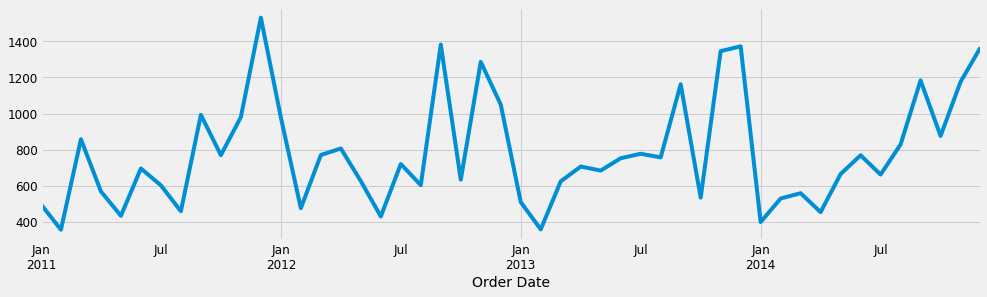

In [11]:
y.plot(figsize=(15,4));
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

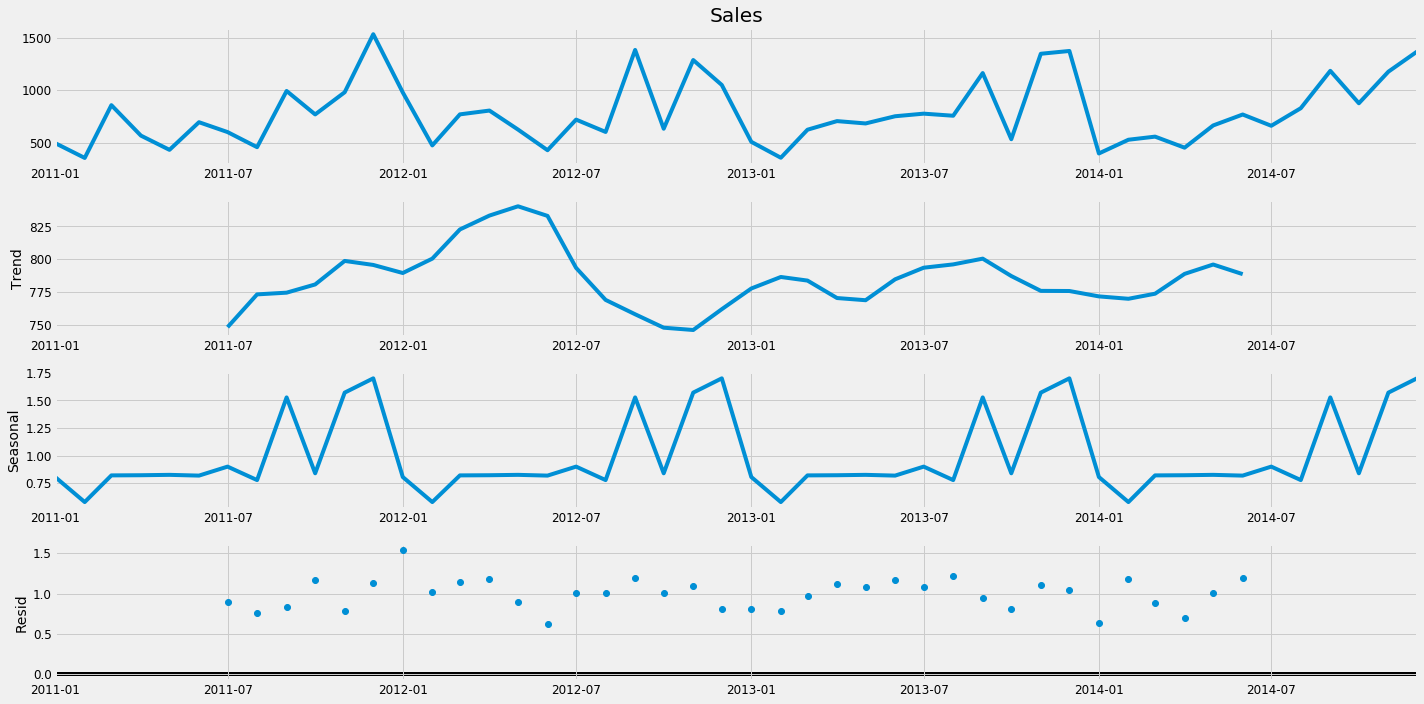

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
decompositon = sm.tsa.seasonal_decompose(y, model = 'multiplicative')
fig = decompositon.plot();
plt.show

# Forecasting using ARIMA

In [13]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

In [14]:
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [15]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:768.9298200948517


C:\Users\Sukanya\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1448.3170456725218
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:476.07009292498395
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:301.21748944198873
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:495.4605330484473


C:\Users\Sukanya\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1295.0301625087027
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.48831350135737
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:303.57424214153235
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:721.7902291441122
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2884.266868148591
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:465.1981274572463
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:290.77284657204876


C:\Users\Sukanya\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:497.74839227991777


C:\Users\Sukanya\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2677.3098537908736
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:320.42707358469147
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:292.58090232014996
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:679.1552417321844


C:\Users\Sukanya\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1458.587675498649
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.6038863908808
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:305.70264172085973
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.33419121773676


C:\Users\Sukanya\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1110.5921743581505
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:321.66678188638747
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:307.2619726821939
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:650.7455741993774
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:3248.68995214507
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:457.0237226715002
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:279.1121964098208
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:484.627129587245
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2712.3702235843693
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:306.759539002992
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:281.10287457343503
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:693.5766094921171


C:\Users\Sukanya\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1553.2501152942732
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:478.0054442595992
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:303.1858986011617
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:479.5489826844688


C:\Users\Sukanya\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1394.5698852546184
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:303.96460566981943
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:305.04387336699784
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:666.7044660723296


C:\Users\Sukanya\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2704.013610821453
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:466.9738782289424
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:291.1665493228643
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:480.1046095775302
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2620.8883657448687
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:303.33509525998164
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:291.22566796435046
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:672.658348330064


C:\Users\Sukanya\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1212.8218622945121
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.20053994185685
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:300.5475860716632
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:474.97590956962955
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1931.4190457468608
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:301.60674558880135
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:302.3772028666448
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:650.2465934337655
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2637.239872817187
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:458.87784652822455
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:280.5910474054756
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:468.20519548967
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:3155.0004126523313
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:296.019801610198
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:282.5810668276195


In [16]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1550      0.295     -0.526      0.599      -0.733       0.423
ma.L1         -1.0000      0.422     -2.370      0.018      -1.827      -0.173
ma.S.L12      -0.2892      0.156     -1.849      0.065      -0.596       0.017
sigma2      2.387e+04   1.77e-05   1.35e+09      0.000    2.39e+04    2.39e+04


We selected this model as value for AIC was least for this particular model. And from the error estimates we can say that our choice of model is preety good.

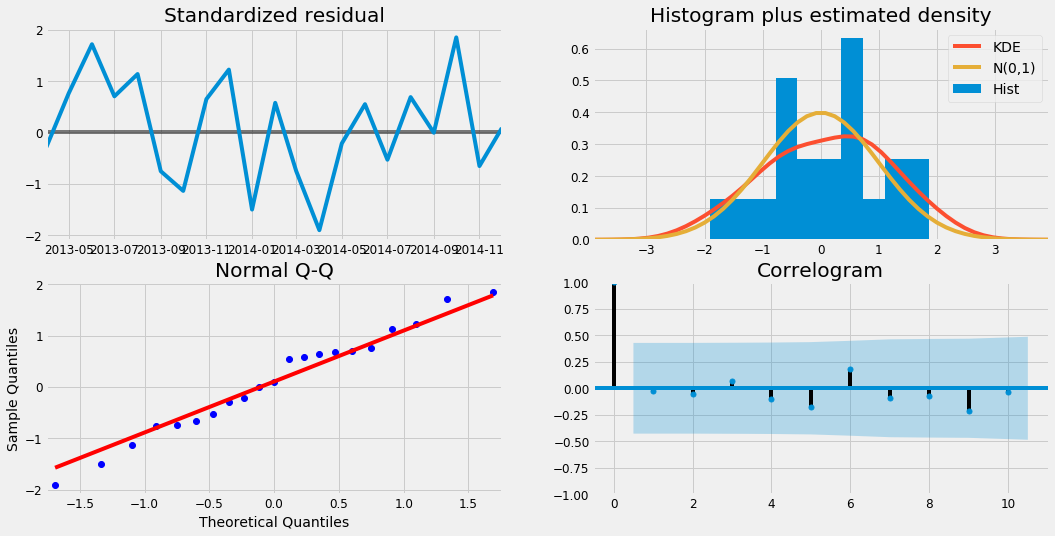

In [17]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

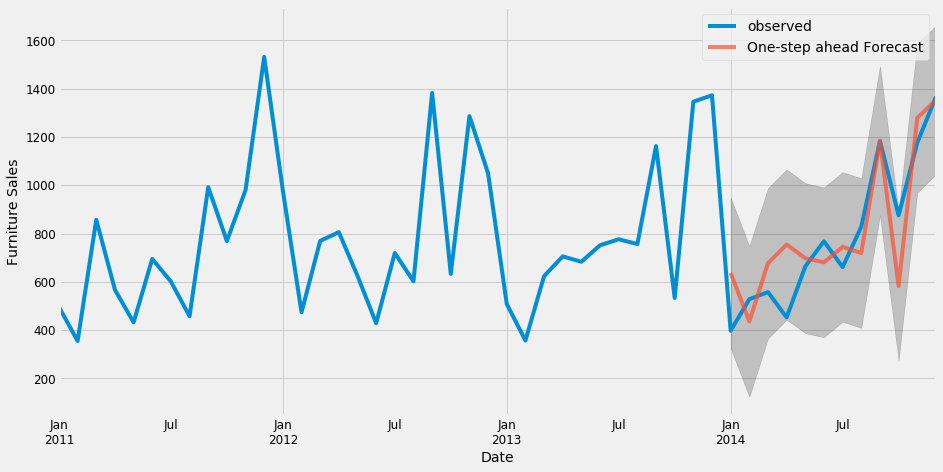

In [18]:
pred = results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2011':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [19]:
y_forecasted = pred.predicted_mean
y_truth = y['2014-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 24601.6


In [20]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 156.85


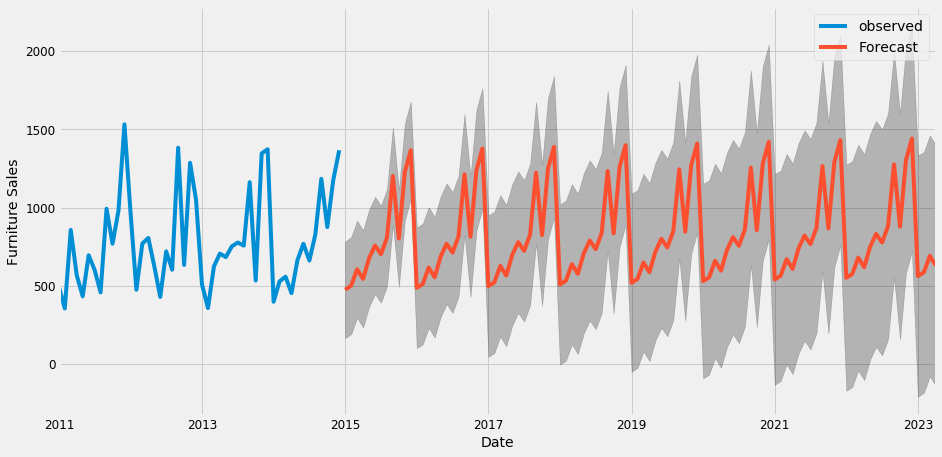

In [21]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

Our model clearly captured furniture sales seasonality. As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.